# Prediction of Online Shoppers Purchasing Intention - datasource.ai

In this competition, we will analyze the activity of users who vist a service/product offered online through a website. The objective is to predict which visitors will decide to buy according to the characteristics and interactions they exhibit on the site.

In this special case, we are working with a classification/clustering problem. Of the 12.330 sessions on the website, 84.58% did not decide to make a purchase, which equals 10.422 and the rest ended up buying (1908)

The data set corresponds to 12,330 unique sessions per user, which are divided into

    8,631 for the training set (Train.csv)
    3,699 for the test.csv set (Test.csv)

This data was obtained over 12 months to avoid special day trends or specific campaigns. 

In the file SampleSubmission.csv you can find the way in which you should send the data, and whose characteristics are:

    You must send your submission file with only 2 columns
    Column 0 should be called: 'id’
    Column 1 should be called: 'revenue’
    The file must contain a total number of 3700 rows, where:
        First row is == header
        The other 3.699 rows == your predictions
    If you do not meet these rules within your submission file, the system will automatically reject it

Note: we recommend you to check the file SampleSubmission.csv, which will be like this:


id           revenue
                  
1            0
2            0 
3 	     1
4            0 
5            1  
6            1
etc.           

Variables definition:

    id: unique ID of the website visitor
    administrative: Number of times the user visited the administrative section
    administrative_duration: Total time the user spent in the administrative section
    informational: Number of times the user visited the informational section
    informational_duration: Total time the user spent in the informational section
    productrelated: Number of times the user visited the related products section
    productrelated_duration: Total time the user spent in the related products section
    bouncerates: This is the percentage of visitors who enter the page and immediately "bounce" without interacting with it. This metric is only taken into account if it is the first page they visit within the website.
    exitrates: From the total number of visits to the pages of the website, the percentage of visitors who logged out through this specific page is obtained, that is, it indicates the percentage of users whose last visit to the website was this specific page.
    pagevalues: This is the average value of the website, it indicates the contribution that this website made to the visitor arriving at the final purchase page or section. 
    specialday: Is the value that indicates the proximity to a special date such as Valentine's Day.  The range of this variable is 0 to 1, with 1 being the exact day of the special date and 0 if there is no range near that date.
    month: Month of the visit to the website.
    operatingsystems: Type of operating system
    browser: Name of the web browser
    region: Visitor's geographic region
    traffictype: Type of web traffic
    visitortype: Whether you are a new visitor or a returning visitor
    Weekend: 0 indicates that it is not a weekend day and 1 indicates that it is a weekend day.

Target variable:

    revenue: Variable to be classified, 1 indicates that the visitor has bought and 0 indicates that the visitor has not bought.

In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

from pathlib import Path

sns.set(style='dark', palette='plasma')
random_state = 42

pd.set_option('max_columns',1000)
pd.set_option('max_rows',1000)

In [2]:
path = Path(os.getcwd())

train = pd.read_csv(path/'train_set.csv', index_col = 'id')
test = pd.read_csv(path/'test_set.csv', index_col = 'id')

In [3]:
train.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,revenue
id,,,,,,,,,,,,,,,,,,
1,0,0.0,0,0.0,5,81.083333,0.04,0.050000,0.0,0.0,Dec,3,2,1,2,New_Visitor,False,0
2,0,0.0,0,0.0,3,189.000000,0.00,0.066667,0.0,0.0,Mar,3,2,8,1,Returning_Visitor,False,0
3,0,0.0,1,132.0,8,445.000000,0.00,0.014286,0.0,0.0,Mar,3,2,4,14,Returning_Visitor,True,0
4,0,0.0,0,0.0,3,0.000000,0.20,0.200000,0.0,0.0,Mar,1,8,2,1,Returning_Visitor,False,0
5,0,0.0,0,0.0,4,14.000000,0.10,0.150000,0.0,0.0,Mar,3,2,1,1,Returning_Visitor,False,0


# EDA

El dataset ya esta limpio

In [4]:
train.shape, test.shape

((8631, 18), (3699, 17))

In [5]:
train.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,revenue
count,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000
mean,2.302398,80.509877,0.508748,34.314914,31.697718,1195.706056,0.021485,0.042400,5.931044,0.059761,2.116672,2.357201,3.149345,4.073224,0.154443
std,3.291140,173.090680,1.280891,135.652626,44.379155,1828.486623,0.047272,0.047634,18.839500,0.196143,0.902649,1.717329,2.408908,4.023450,0.361394
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,186.475000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000
50%,1.000000,7.625000,0.000000,0.000000,18.000000,602.883333,0.003030,0.025000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000
75%,4.000000,91.950000,0.000000,0.000000,37.000000,1477.564759,0.016667,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000
max,27.000000,2720.500000,24.000000,2195.300000,705.000000,43171.233380,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8631 entries, 1 to 8631
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           8631 non-null   int64  
 1   Administrative_Duration  8631 non-null   float64
 2   Informational            8631 non-null   int64  
 3   Informational_Duration   8631 non-null   float64
 4   ProductRelated           8631 non-null   int64  
 5   ProductRelated_Duration  8631 non-null   float64
 6   BounceRates              8631 non-null   float64
 7   ExitRates                8631 non-null   float64
 8   PageValues               8631 non-null   float64
 9   SpecialDay               8631 non-null   float64
 10  Month                    8631 non-null   object 
 11  OperatingSystems         8631 non-null   int64  
 12  Browser                  8631 non-null   int64  
 13  Region                   8631 non-null   int64  
 14  TrafficType             

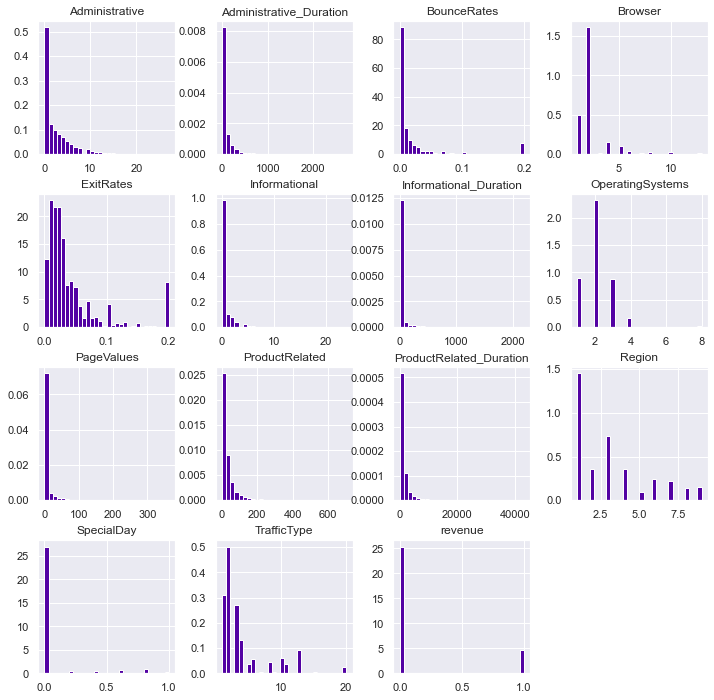

In [7]:
train_no_bool = train[[col for col in train.columns if col != 'Weekend']] #No sale en el hist y tira error 
train_no_bool.hist(bins=30, figsize=(12,12), density=True);

#Vemos que la mayoria de los datos estan skewed

Averiguar como tratar skewed data, como transformarla

## Elimino outliers con IQR rule

In [8]:
def encontrar_rango_outlier(df, col, distancia):
    """
    Encuentra rango de IQR para detectar outliers de una variable de un df, 
    retorna upper y lower value del rango
    """
    
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    
    upper = df[col].quantile(0.75) + IQR*distancia
    lower = df[col].quantile(0.25) - IQR*distancia
    
    return lower, upper

In [9]:
#Veo para la var product related

lower, upper = encontrar_rango_outlier(train, 'ProductRelated', 1.5)
lower, upper

#claramente el 0 se repite mucho, no va a haber un lower outlier

(-38.0, 82.0)

In [10]:
#los busco en mi df, mediante la creacion de un boolean vector para hacer un masking del df

def encontrar_outliers(df, col, distancia):
    """
    Basado en los valores del rango IQR, encuentra los outliers en la columna del df dada
    """
    
    lower, upper = encontrar_rango_outlier(df, col, distancia)
    outliers_bool = np.where(df[col] > upper, True,
                       np.where(df[col] < lower, True, False))
    
    outliers = df.loc[outliers_bool, col]
    
    return outliers

def eliminar_outliers(df, col, distancia):
    """
    Elimina outliers encontrados en una columna del df,
    retorna df[col]
    """
    
    outliers_bool = np.where(df[col] > upper, True,
                       np.where(df[col] < lower, True, False))
    
    col_sin_out = df.loc[~outliers_bool, col]
    
    return col_sin_out

In [11]:
train.columns is train.dtypes.keys()

True

In [12]:
#Obtengo num_cols para eliminar outliers, no puedo hacerlo para cols con values como string

num_cols = list()

for col in train.columns:
    if train.dtypes[f'{col}'] == 'int64':
        num_cols.append(col)
    elif train.dtypes[f'{col}'] == 'float64':
        num_cols.append(col)
    else:
        pass

for col in num_cols:
    train[col] = eliminar_outliers(train, col, 1.5)
    #me origina Nans, los filleo con el mean value
    train[col].fillna(value=np.mean(train[col]), inplace=True)
    

#Elimino outliers en test df tambien:

test_num_cols = [col for col in num_cols if col != 'revenue']

for col in test_num_cols:
    test[col] = eliminar_outliers(test, col, 1.5)
    test[col].fillna(value=np.mean(test[col]), inplace=True)
    
if sum(train.isna().sum()) == 0:
    print('Train Nans ok')
if sum(test.isna().sum()) == 0:
    print('Test Nans ok')

Train Nans ok
Test Nans ok


La iteracion con outliers removal empeoran la performance del modelo

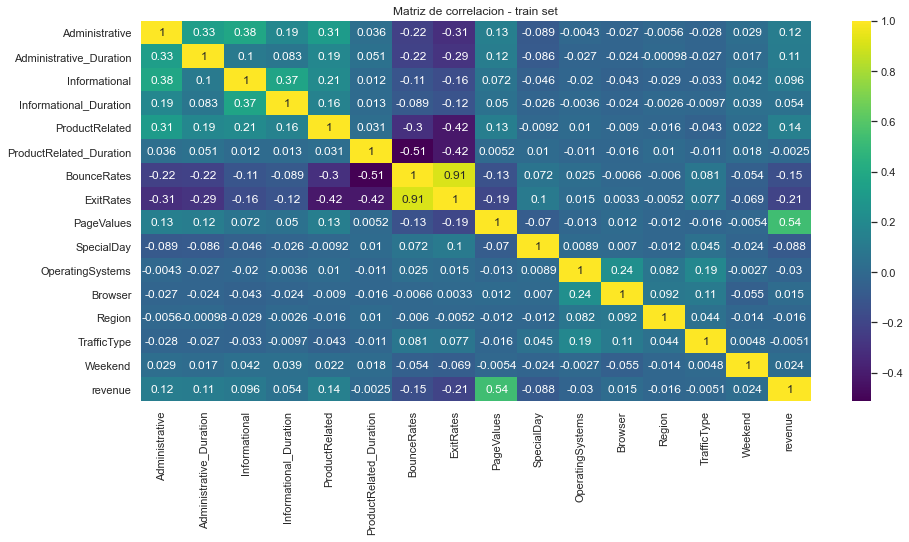

In [13]:
corr_matrix = train.corr()

_= plt.figure(figsize = (15,7))
_= plt.title('Matriz de correlacion - train set')
_= sns.heatmap(corr_matrix, cmap = 'viridis', annot = True)

plt.show()

## Chequeo Features Scaling

In [14]:
scale = train[num_cols].max() - train[num_cols].min()
scale.sort_values(ascending=True)
#Las secciones de duration y su var cat estan en rangos mayores.
#las de ratios obviamente tienen rangos menos a 1

BounceRates                 0.200000
ExitRates                   0.200000
SpecialDay                  1.000000
revenue                     1.000000
OperatingSystems            7.000000
Region                      8.000000
Browser                    12.000000
TrafficType                19.000000
Informational              24.000000
Administrative             27.000000
PageValues                 81.758458
Administrative_Duration    82.000000
Informational_Duration     82.000000
ProductRelated             82.000000
ProductRelated_Duration    82.000000
dtype: float64

In [15]:
corr_matrix['revenue'].sort_values()

ExitRates                 -0.205970
BounceRates               -0.149516
SpecialDay                -0.088374
OperatingSystems          -0.030024
Region                    -0.015983
TrafficType               -0.005069
ProductRelated_Duration   -0.002453
Browser                    0.014909
Weekend                    0.023915
Informational_Duration     0.053625
Informational              0.096333
Administrative_Duration    0.114318
Administrative             0.122744
ProductRelated             0.140074
PageValues                 0.535780
revenue                    1.000000
Name: revenue, dtype: float64

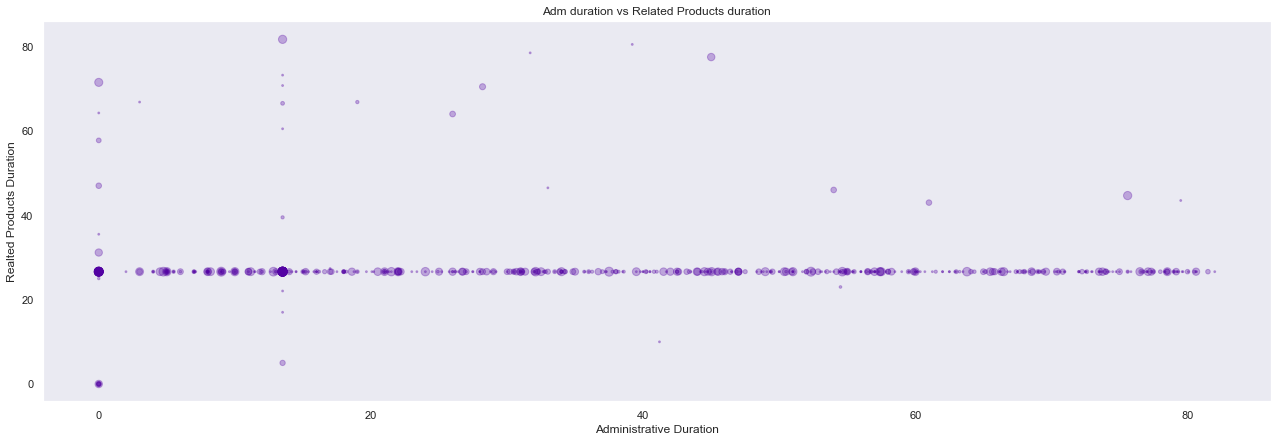

In [16]:
#Cut outliers for better visulization

train_v = train.copy()
train_v.loc[train.Administrative_Duration > 1000, 'Administrative_Duration'] = 1000
train_v.loc[train.ProductRelated_Duration > 10000, 'ProductRelated_Duration'] = 10000
train_v.loc[train.Informational_Duration > 100, 'Informational_Duration'] = 100

#Plot visualization

_= plt.figure(figsize = (22,7))
_= plt.title('Adm duration vs Related Products duration')
_= plt.xlabel('Administrative Duration')
_= plt.ylabel('Realted Products Duration')
_= plt.scatter(train_v.Administrative_Duration, train_v.ProductRelated_Duration, 
               train_v.Informational_Duration, alpha = .3)

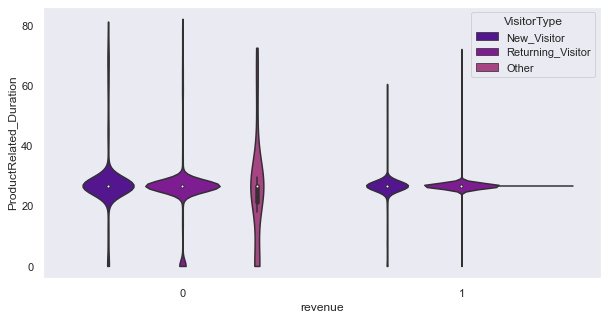

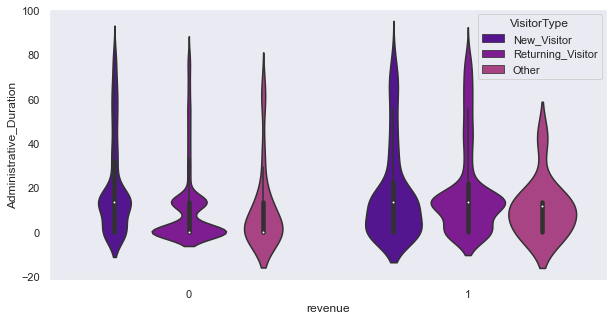

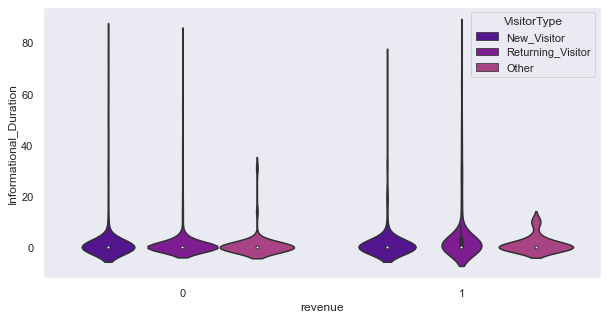

In [17]:
#Swarmplot takes really long to run when many values overlap, make violinplot instead

_= plt.figure(figsize = (10,5))
_= sns.violinplot(train_v['revenue'], train_v['ProductRelated_Duration'], hue =  train_v['VisitorType'], cut = 0)
plt.show()
_= plt.figure(figsize = (10,5))
_= sns.violinplot(train_v['revenue'], train_v['Administrative_Duration'], hue =  train_v['VisitorType'])
plt.show()
_= plt.figure(figsize = (10,5))
_= sns.violinplot(train_v['revenue'], train_v['Informational_Duration'], hue =  train_v['VisitorType'])
plt.show()

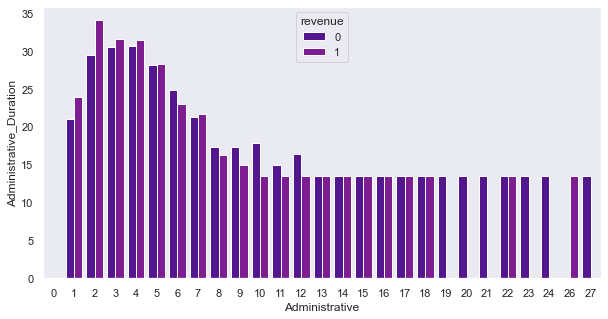

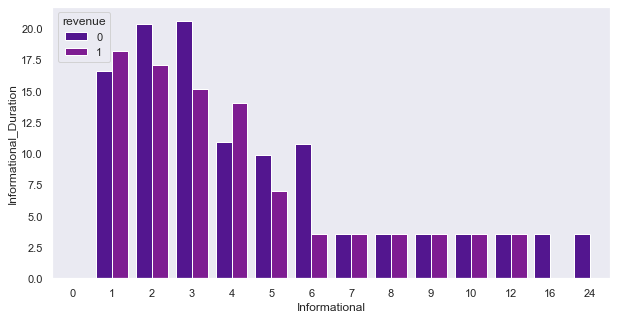

In [18]:
_= plt.figure(figsize = (10,5))
_= sns.barplot('Administrative', 'Administrative_Duration', hue = 'revenue', data = train, ci = False)
plt.show()
_= plt.figure(figsize = (10,5))
_= sns.barplot('Informational', 'Informational_Duration', hue = 'revenue', data = train, ci = False)
plt.show()

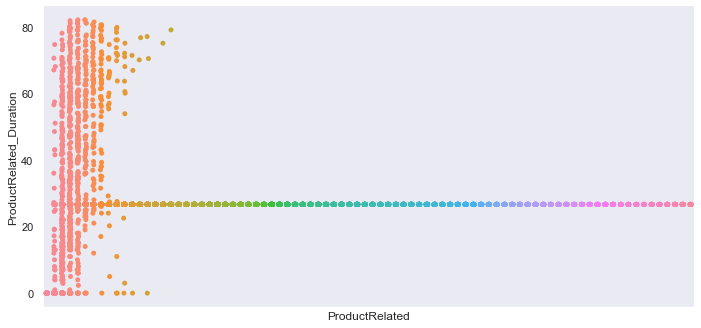

In [19]:
_= sns.catplot('ProductRelated', 'ProductRelated_Duration', data=train_v, height=5, aspect=2)
_= plt.xticks([])     #Delete x axis labels for cleannes
plt.show()

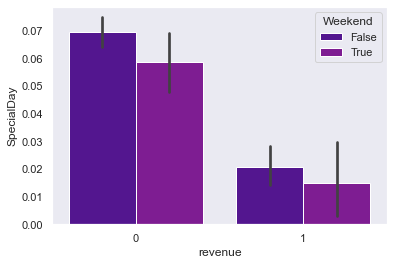

In [20]:
_= sns.barplot(train.revenue, train.SpecialDay, train.Weekend)
plt.show()

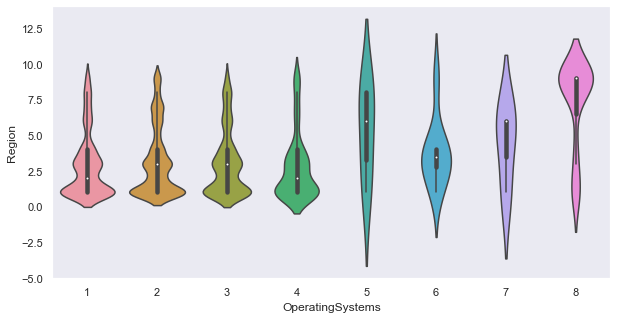

In [21]:
_= plt.figure(figsize = (10,5))
_= sns.violinplot(train.OperatingSystems, train.Region)

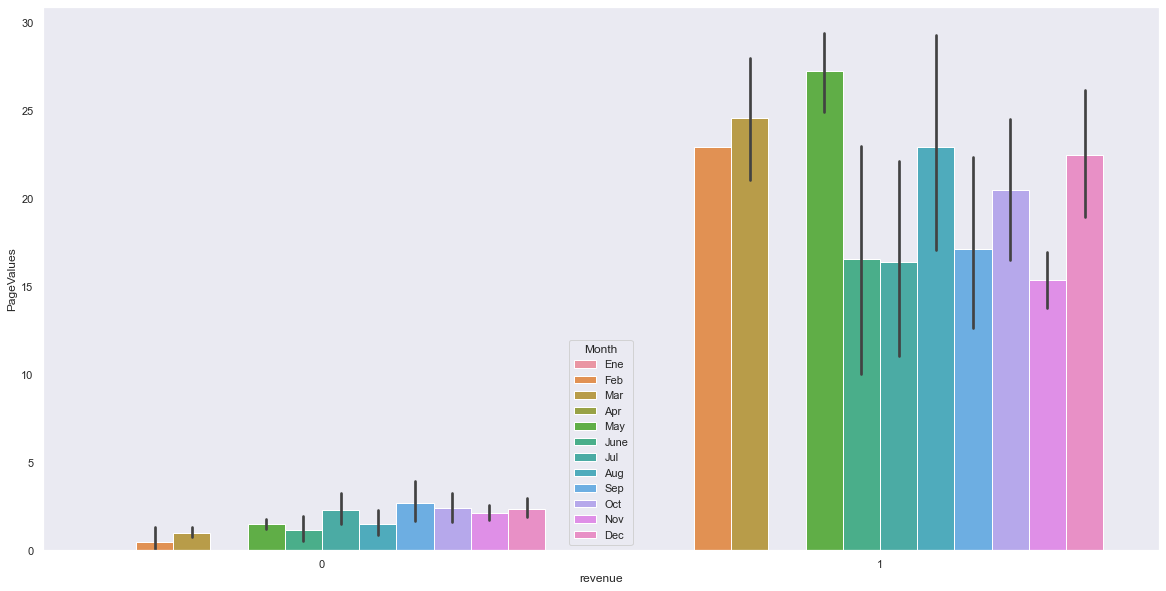

In [22]:
_= plt.figure(figsize = (20,10))
order = ['Ene', 'Feb', 'Mar', 'Apr', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
_= sns.barplot(train.revenue, train.PageValues, train.Month, hue_order=order)

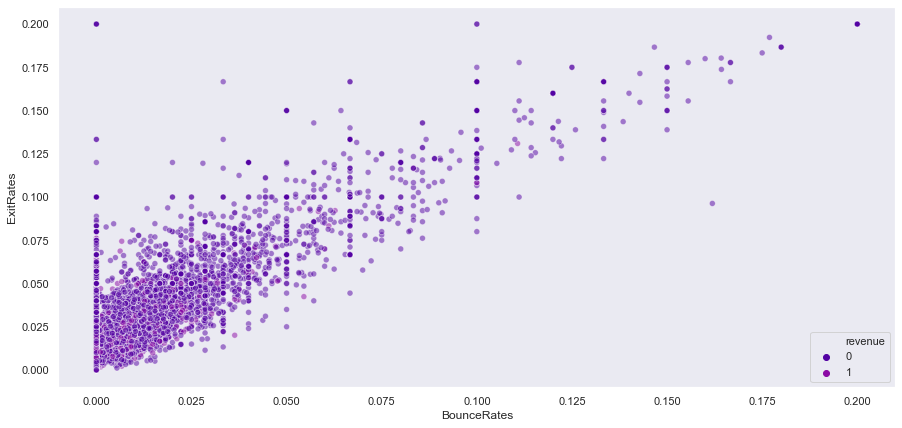

In [23]:
_= plt.figure(figsize = (15,7))
_= sns.scatterplot(train.BounceRates, train.ExitRates, train.revenue, alpha =.5)

In [24]:
train.Month.unique()

array(['Dec', 'Mar', 'Oct', 'May', 'Nov', 'Aug', 'Jul', 'Sep', 'Feb',
       'June'], dtype=object)

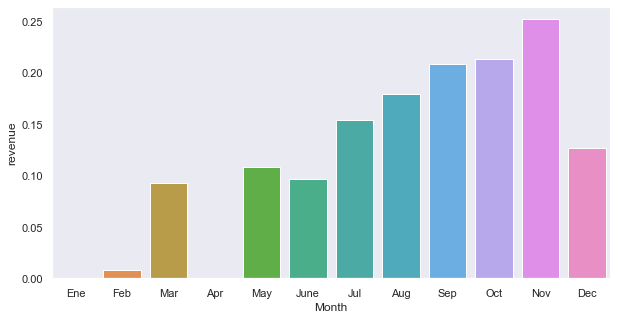

In [25]:
_= plt.figure(figsize = (10,5))
order = ['Ene', 'Feb', 'Mar', 'Apr', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
_= sns.barplot('Month', 'revenue', data = train, ci = False, order=order)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


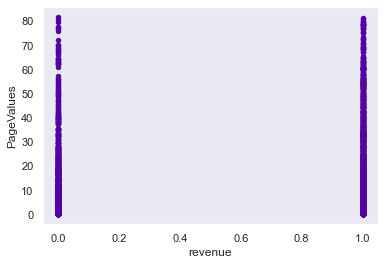

In [26]:
train.plot(kind='scatter', x='revenue', y='PageValues');

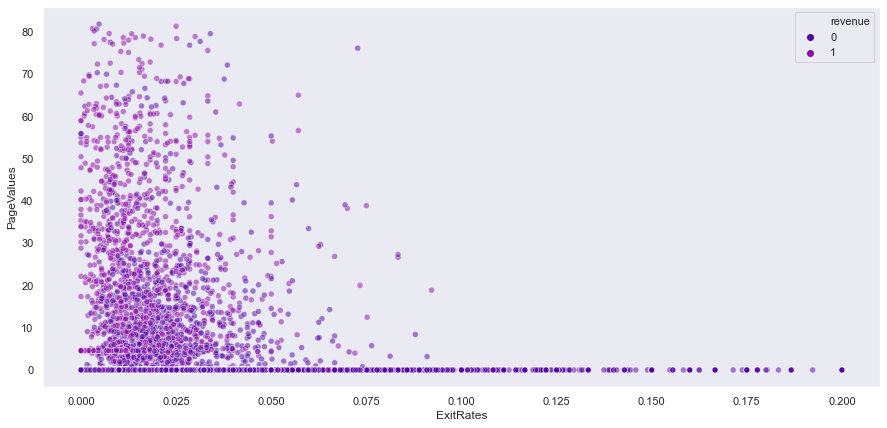

In [27]:
_= plt.figure(figsize = (15,7))
_= sns.scatterplot(train.ExitRates, train.PageValues, train.revenue, alpha =.5)

# Preprocessing

Preprocessing de las variables VisitorType, Weekend & Month

In [28]:
train.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,revenue
id,,,,,,,,,,,,,,,,,,
1,0,0.0,0,0.000000,5.0,81.083333,0.04,0.050000,0.0,0.0,Dec,3,2,1,2,New_Visitor,False,0
2,0,0.0,0,0.000000,3.0,26.626205,0.00,0.066667,0.0,0.0,Mar,3,2,8,1,Returning_Visitor,False,0
3,0,0.0,1,3.561119,8.0,26.626205,0.00,0.014286,0.0,0.0,Mar,3,2,4,14,Returning_Visitor,True,0
4,0,0.0,0,0.000000,3.0,0.000000,0.20,0.200000,0.0,0.0,Mar,1,8,2,1,Returning_Visitor,False,0
5,0,0.0,0,0.000000,4.0,14.000000,0.10,0.150000,0.0,0.0,Mar,3,2,1,1,Returning_Visitor,False,0


In [29]:
train.VisitorType.unique()

array(['New_Visitor', 'Returning_Visitor', 'Other'], dtype=object)

In [30]:
VisitorType_map = {'New_Visitor': 0, 'Returning_Visitor': 1, 'Other': 2}
train.VisitorType = train.VisitorType.map(VisitorType_map)
test.VisitorType = test.VisitorType.map(VisitorType_map)

In [31]:
def WeekendMapping(x):
    """Maps Weekend bool var to binary var"""
    
    if x:
        return 1
    else:
        return 0

for df in [train, test]:
    df['WeekendOk'] = df.Weekend.apply(WeekendMapping)  
    df.drop('Weekend', axis=1, inplace=True)

In [32]:
ns = [i for i in range(len(train.Month.unique()))]
months = train.Month.unique().tolist()

MonthMapping = dict(zip(months, ns))
for df in [train, test]:
    df.Month = df.Month.map(MonthMapping)

In [33]:
test.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,WeekendOk
id,,,,,,,,,,,,,,,,,
1,3,13.035316,0,0.000000,48.000000,24.289388,0.004348,0.013043,0.000000,0.0,4,1,8,6,11,1,0
2,6,13.035316,2,3.820654,21.524919,24.289388,0.002198,0.004916,2.086218,0.0,1,2,2,3,2,1,0
3,1,41.125000,0,0.000000,21.524919,24.289388,0.000688,0.012823,3.451072,0.0,4,2,2,2,2,1,0
4,2,13.035316,0,0.000000,10.000000,24.289388,0.008333,0.026389,36.672294,0.0,5,2,5,7,4,1,0
5,18,13.035316,6,3.820654,21.524919,24.289388,0.006632,0.013528,10.150644,0.0,5,2,2,3,1,1,1


In [34]:
X = train.copy()
X_test = test.copy()
X.drop('revenue', axis=1, inplace=True)
y = train['revenue']

### Clustering

Must get rid of all cat vars from the dataset in order to perform effective clustering.
On practice performance decreases with this modification, see last commit on git repo

In [35]:
X.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'WeekendOk'],
      dtype='object')

In [36]:
num_cols = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 
           'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

X_cluster = X[num_cols]
X_test_cluster = X_test[num_cols]

In [37]:
#KMeans

kmeans = KMeans(n_clusters=6)                 #Optimal value
cluster_km = kmeans.fit_predict(X_cluster)
km_cluster = pd.Series(cluster_km)
X['km_cluster'] = km_cluster
X['km_cluster'].fillna(0, inplace=True)       #Got 1 Nan no idea why, get rid of it

cluster_km_test = kmeans.fit_predict(X_test)
km_cluster_test = pd.Series(cluster_km_test)
X_test['km_cluster'] = km_cluster_test
X_test['km_cluster'].fillna(0, inplace=True)

KMeans Improves performance of Tree and logreg models, but does not perform better than Gradient Boosting.

#DBSCAN

eps = [0.5, 0.75, 1, 5, 10, 50, 100]
min_samples = [2, 5, 10, 20, 50, 100]

best_params = dict()

for e in eps:
    for samp in min_samples:
        dbscan = DBSCAN(eps=e, min_samples=samp)
        dbscan.fit(X_cluster)
        clusters = pd.Series(dbscan.labels_)
        #If DBSCAN Returns many labels and few anomalies, then I consider it as a feature
        if (len(clusters.unique()) > 5) & (clusters.value_counts().sort_index()[-1] < len(X)/4):
            best_params[e] = samp
            
best_params

dbscan = DBSCAN(eps=100, min_samples=5)
dbscan.fit(X)
clusters = pd.Series(dbscan.labels_)
clusters.value_counts().sort_index()

dbscan.fit(X_cluster)
X['DBS_cluster'] = dbscan.labels_
dbscan.fit(X_test_cluster)
X_test['DBS_cluster'] = dbscan.labels_

DBSCAN does not improve performance except in tree models, doesnt perform better than gbc

In [38]:
X_train, X_valid, y_train, y_valid = train_test_split(
                                        X, y, test_size=0.2, 
                                        random_state=random_state)

print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape, X_test.shape)

(6904, 18) (1727, 18) (6904,) (1727,) (3699, 18)


# Modelling

In [39]:
knc = KNeighborsClassifier()
knc_model = knc.fit(X_train, y_train)
y_pred = knc_model.predict(X_valid)

f1_score(y_valid, y_pred, average = 'macro')

0.7222234763616663

In [40]:
logreg = LogisticRegression()
logreg_model = logreg.fit(X_train, y_train)
y_pred = logreg_model.predict(X_valid)

f1_score(y_valid, y_pred, average = 'macro')

C:\Users\desar\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6959566518651826

In [41]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda_model = lda.fit(X_train, y_train)
y_pred = lda.predict(X_valid)

f1_score(y_valid, y_pred, average = 'macro')

0.7180744107095469

In [42]:
svc = SVC(random_state=random_state, probability = True)
svc_model = svc.fit(X_train, y_train)
y_pred = svc_model.predict(X_valid)

f1_score(y_valid, y_pred, average = 'macro')

0.7492085620516395

In [43]:
tree = DecisionTreeClassifier(random_state=random_state)
tree_model = tree.fit(X_train, y_train)
y_pred = tree_model.predict(X_valid)

f1_score(y_valid, y_pred, average = 'macro')

0.7150666901480253

In [44]:
forest = RandomForestClassifier(random_state=random_state, oob_score=True)
rfc_model = forest.fit(X_train, y_train)
y_pred = rfc_model.predict(X_valid)

f1_score(y_valid, y_pred, average = 'macro')

0.7929643855585766

In [45]:
etc = ExtraTreesClassifier(random_state=random_state)
etc_model = forest.fit(X_train, y_train)
y_pred = etc_model.predict(X_valid)

f1_score(y_valid, y_pred, average = 'macro')

0.7929643855585766

In [46]:
gbc = GradientBoostingClassifier(random_state=random_state)
gbc_model = gbc.fit(X_train, y_train)
y_pred = gbc_model.predict(X_valid)

f1_score(y_valid, y_pred, average = 'macro')

0.8113624254049446

In [47]:
abc = AdaBoostClassifier(random_state=random_state)
abc_model = abc.fit(X_train, y_train)
y_pred = abc_model.predict(X_valid)

f1_score(y_valid, y_pred, average = 'macro')

0.7777772537934036

In [48]:
mlpc = MLPClassifier(random_state=random_state)
mlpc_model = mlpc.fit(X_train, y_train)
y_pred = mlpc_model.predict(X_valid)

f1_score(y_valid, y_pred, average = 'macro')

0.7878601183183394

In [49]:
votingC = VotingClassifier(
    estimators=[('rfc', RandomForestClassifier(random_state = random_state)),
                ('extc', ExtraTreesClassifier(random_state = random_state)),                 
                ('gbc', GradientBoostingClassifier(random_state = random_state))],
    voting = 'hard', n_jobs = 6)

voting_model = votingC.fit(X_train, y_train)
y_pred = voting_model.predict(X_valid)

f1_score(y_valid, y_pred, average = 'macro')

0.7876162077313377

In [50]:
sub = gbc_model.predict(X_test)

submission = pd.DataFrame({'id': test.index, 'revenue': sub})

submission.to_csv('submission.csv', index = False)

from sklearn.model_selection import KFold
from tpot import TPOTClassifier

KF = KFold(n_splits=5)
folds = KF.split(X_train)

# Defino busqueda
model_tpot = TPOTClassifier(generations=10, population_size=100, scoring='f1',
                            cv=folds, verbosity=2, random_state=1312, n_jobs=-1)
# Entreno
model_tpot.fit(X_train, y_train)

score = model_tpot.score(X_valid, y_valid)
print('Best score: ', score)

best_model_tpot = model_tpot.fitted_pipeline_[0]
print('Best model: ', best_model_tpot)